In [1]:
from rsna_retro.imports import *
from rsna_retro.metadata import *
from rsna_retro.preprocess import *
from rsna_retro.train import *
from rsna_retro.train3d import *

In [2]:
torch.cuda.set_device(4)

In [3]:
df_any = meta.df_any
df_any.head()

,Modality,PatientID,StudyInstanceUID,SeriesInstanceUID,StudyID,ImagePositionPatient,ImageOrientationPatient,SamplesPerPixel,PhotometricInterpretation,Rows,...,MultiWindowCenter,WindowCenter1,MultiWindowWidth,WindowWidth1,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
SOPInstanceUID,,,,,,,,,,,,,,,,,,,,,
ID_2a8702d25,CT,ID_ff137633,ID_d17053848c,ID_7098f7c836,,-126.437378,1.0,1,MONOCHROME2,512,...,NaN,NaN,NaN,NaN,1,0,1,1,0,0
ID_66891ac22,CT,ID_42940b2c,ID_17e33f43d0,ID_e14dd0090b,,-125.000000,1.0,1,MONOCHROME2,512,...,NaN,NaN,NaN,NaN,1,0,1,0,0,0
ID_8e6e5b51f,CT,ID_76fbed32,ID_1d8eaa14ef,ID_e3919709a0,,-125.000000,1.0,1,MONOCHROME2,512,...,NaN,NaN,NaN,NaN,1,0,0,0,0,1
ID_cb8b9b514,CT,ID_20039b63,ID_1cfe3e70dd,ID_e3b5d8d9b8,,-125.000000,1.0,1,MONOCHROME2,512,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
ID_ee683911f,CT,ID_a065f3ac,ID_9c727ac231,ID_99e83a310d,,-125.000000,1.0,1,MONOCHROME2,512,...,1.0,40.0,1.0,80.0,0,0,0,0,0,0


In [4]:
dbunch = get_3d_dbunch(df_any)

In [5]:
x,y = dbunch.one_batch()
x.shape, y.shape

(torch.Size([40, 3, 256, 256]), torch.Size([40, 6]))

## Model

In [6]:
m = get_3d_head()

In [7]:
config=dict(custom_head=m, init=None)
learn = get_learner(dbunch, xresnet18, get_loss(), config=config)

In [8]:
learn.load(f'runs/baseline_any-2b', strict=False)

In [9]:
learn.model

Sequential(
  (0): Sequential(
    (0): ConvLayer(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): ConvLayer(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): ConvLayer(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): ResBlock(
        (convs): Sequential(
          (0): ConvLayer(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): Batch

In [10]:
# learn.summary()

## Training

In [12]:
name = 'train3d_baseline_18'

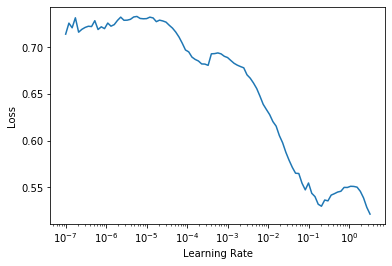

In [12]:
learn.lr_find()

In [13]:
do_fit(learn, 6, 3e-2, freeze=False)
learn.save(f'runs/{name}-1')

KeyboardInterrupt: 

In [ ]:
do_fit(learn, 8, 1e-2, freeze=False)
learn.save(f'runs/{name}-2')

In [15]:
# OLD model with wrong split
do_fit(learn, 20, 3e-2, freeze=False)
learn.save(f'runs/{name}-1')

epoch,train_loss,valid_loss,accuracy_multi,accuracy_any,time
0,0.199542,0.226810,0.921796,0.869681,16:49
1,0.244871,0.351508,0.895710,0.766805,16:10
2,0.235130,0.469860,0.866218,0.767920,16:16
3,0.290569,0.365121,0.869017,0.684917,16:10
4,0.275412,0.270910,0.896105,0.802325,16:05
5,0.265006,0.438188,0.866922,0.672885,16:11
6,0.263249,0.254976,0.903770,0.821623,16:12
7,0.258602,0.259598,0.902165,0.826321,16:13
8,0.249462,0.264342,0.900796,0.821522,16:23
9,0.248955,0.259794,0.905517,0.839738,16:03
